In [1]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

from scipy.ndimage import zoom

Saving image to: image_processed/moon_filtered.png


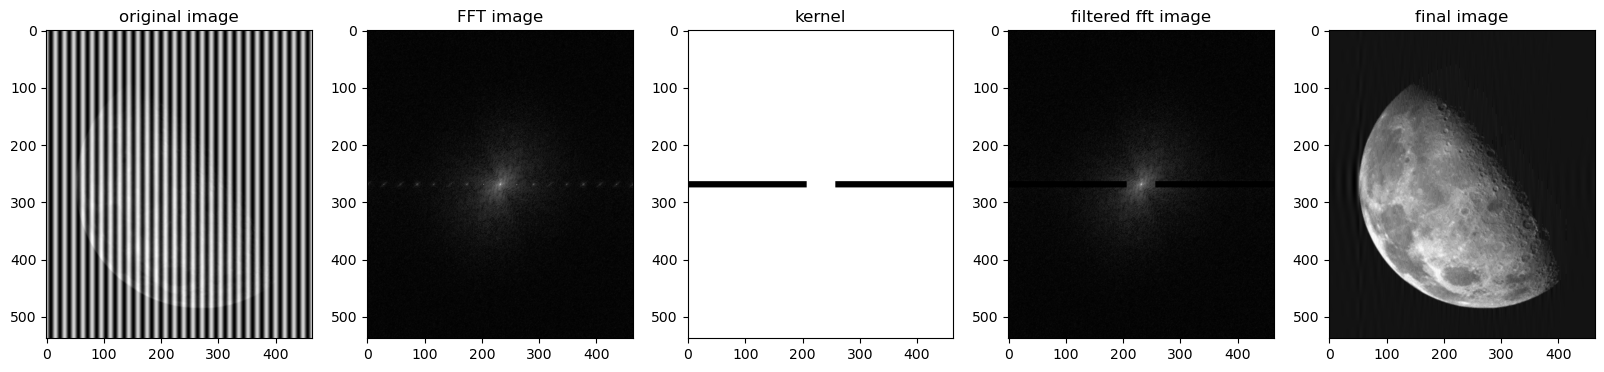

In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)

    ## Create kernel
    kernel = np.ones(im.shape)
    center_row = kernel.shape[0]//2
    ## Create line in the middle
    line_thickness = 4

    for i in range(center_row - line_thickness // 2, center_row + line_thickness // 2 + 1):
        kernel[i, :] = 0
    ## Remove middle of the line
    middle_dims = (50,50)
    start_row = (kernel.shape[0] - middle_dims[0]) // 2
    end_row = start_row + middle_dims[0]
    start_col = (kernel.shape[1] - middle_dims[1]) // 2
    end_col = start_col + middle_dims[1]
    
    kernel[start_row:end_row, start_col:end_col] = 1


    f = np.fft.fft2(im)
    fft_kernel = np.fft.fft2(kernel, s=f.shape)
    fshift = np.fft.fftshift(f)
    kshift = np.fft.ifftshift(kernel)
    fftresult = f*kshift
    conv_result = np.fft.ifft2(fftresult).real
    im_filtered = conv_result

    ## visual
    fft = np.log(np.abs(fshift)+1) ## add 1 to reduce noise
    fftresult_vis = np.log(np.abs(np.fft.fftshift(fftresult)) + 1) ## add 1 to reduce noise
    
    ## show filtered image
    plt.figure(figsize=(20,4))
    plt.subplot(1,5,1)
    plt.title("original image")
    plt.imshow(im, cmap="gray")
    ## show fft image
    plt.subplot(1,5,2)
    plt.title("FFT image")
    plt.imshow(fft,cmap="gray")
    ## show filter
    plt.subplot(1,5,3)
    plt.title("kernel")
    plt.imshow(kernel.real, cmap="gray")
    ## show result
    plt.subplot(1,5,4)
    plt.title("filtered fft image")
    plt.imshow(fftresult_vis, cmap="gray")

    ## show final image
    plt.subplot(1,5,5)
    plt.title("final image")
    plt.imshow(conv_result, cmap="gray")
    

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))